In [2]:
#!/usr/bin/python
# Plots lightcurves from any instrument with a given grouping
# 
import matplotlib.pyplot as plt
from astropy.io import fits as pyfits
import numpy as np
from math import *
%matplotlib inline

In [3]:
#find the start index of next bin
def each_bin(x,start,time_interval):
        i=start
        while i < len(x) and x[i] < x[start]+time_interval:
                i+=1
        return i

In [4]:
def bin_lc(filename,time_interval):
        # read fits file
        hdulist = pyfits.open(filename)
        start_date = hdulist[1].header['TSTART']
        data = hdulist[1].data
        time = data['TIME']
        rate = data['RATE']
        error = data['ERROR']

        start=0
        avg_rate=[];error_rate=[];avg_time=[];error_time_left=[];error_time_right=[]
        while start < len(time):
                sum_rate=0; sum_errorsq=0; sum_time=0
                end=each_bin(time,start,time_interval)
                for k in range(start,end):
                        sum_rate+=rate[k]
                        sum_errorsq+=pow(error[k],2)
                        sum_time+=time[k]
                avg=float(sum_rate)/(end-start)
                error_time_left.append(float(sum_time)/(end-start)-time[start])
                error_time_right.append(time[end-1]-float(sum_time)/(end-start))
                error_rate.append(sqrt(sum_errorsq)/(end-start))
                avg_rate.append(avg)
                #avg_time.append(float(sum_time)/(end-start))
                # Adds start time in MET
                avg_time.append(float(sum_time)/(end-start)+float(start_date))
                start=end
        return [avg_time,avg_rate,error_rate]

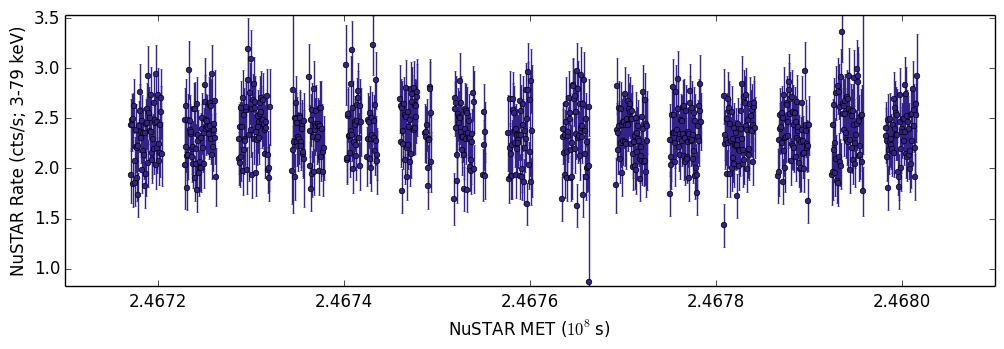

In [5]:
filenu="/Users/javier/IGR_J16597/spec2/nu90301324001_srcA_10to20_sr.lc"
#
time_interval=60  # in seconds
#
# Get the data for the first file
lc = bin_lc(filenu,time_interval)
avg_time = map(lambda x:x/1e8, lc[0]) # Divide by 1.e8 for easy formating
avg_rate = lc[1]
error_rate = lc[2]
#
#
fig, (ax) = plt.subplots(1,1,facecolor='w',figsize=(12,3.5))
#
ax.errorbar(avg_time,avg_rate,yerr=error_rate,marker='None',linestyle='None',capsize=1,color='#332288')
ax.plot(avg_time,avg_rate,'o',markersize=4.0,color='#332288')
ax.set_xlabel('NuSTAR MET ($10^8$s)',fontsize=12)
#
ymin = sorted(set(avg_rate))[1]
ymax = sorted(set(avg_rate))[-2]
ax.set_ylim(ymin-0.05*ymin,ymax+0.05*ymax)
ax.set_ylabel('NuSTAR Rate (cts/s; 3-79 keV)',fontsize=12)
#
#xmin=2.467168
#xmax=2.467208
#ax.set_xlim(xmin,xmax)
#
# Fonts for labels and related stuff
ax.tick_params(labelsize=12)
#
# Format tick marks
from matplotlib.ticker import FormatStrFormatter
ax.xaxis.set_major_formatter(FormatStrFormatter('%.4f'))

## Control frequency of tick marks
#import matplotlib.ticker as ticker
#tick_spacing = 0.001
#ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
##
##
## Legends
#plt.text(1.6802, 2.50, 'ObsId 60101043002', color='#332288', fontsize=14)
#plt.text(1.6802, 2.43, 'ObsId 410017010', color='#44AA99', fontsize=14)

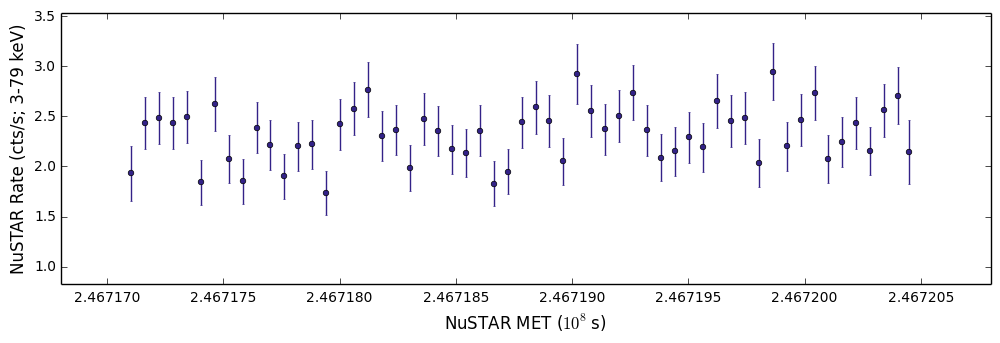

In [6]:
fig, (ax) = plt.subplots(1,1,facecolor='w',figsize=(12,3.5))
#
ax.errorbar(avg_time,avg_rate,yerr=error_rate,marker='None',linestyle='None',capsize=1,color='#332288')
ax.plot(avg_time,avg_rate,'o',markersize=4.0,color='#332288')
ax.set_xlabel('NuSTAR MET ($10^8$s)',fontsize=12)
#
ymin = sorted(set(avg_rate))[1]
ymax = sorted(set(avg_rate))[-2]
ax.set_ylim(ymin-0.05*ymin,ymax+0.05*ymax)
ax.set_ylabel('NuSTAR Rate (cts/s; 3-79 keV)',fontsize=12)

xmin=2.467168
xmax=2.467208
ax.set_xlim(xmin,xmax)
# Format tick marks
from matplotlib.ticker import FormatStrFormatter
ax.xaxis.set_major_formatter(FormatStrFormatter('%.6f'))

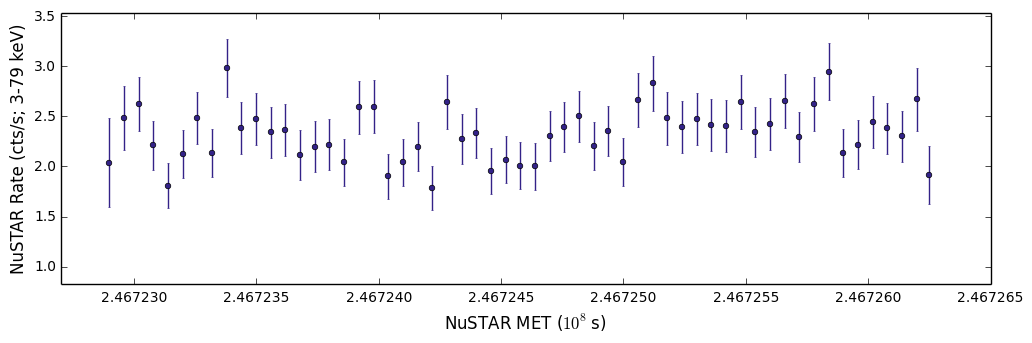

In [7]:

fig, (ax) = plt.subplots(1,1,facecolor='w',figsize=(12,3.5))
#
ax.errorbar(avg_time,avg_rate,yerr=error_rate,marker='None',linestyle='None',capsize=1,color='#332288')
ax.plot(avg_time,avg_rate,'o',markersize=4.0,color='#332288')
ax.set_xlabel('NuSTAR MET ($10^8$s)',fontsize=12)
#
ymin = sorted(set(avg_rate))[1]
ymax = sorted(set(avg_rate))[-2]
ax.set_ylim(ymin-0.05*ymin,ymax+0.05*ymax)
ax.set_ylabel('NuSTAR Rate (cts/s; 3-79 keV)',fontsize=12)


xmin=2.467227
xmax=2.467265
ax.set_xlim(xmin,xmax)
# Format tick marks
from matplotlib.ticker import FormatStrFormatter
ax.xaxis.set_major_formatter(FormatStrFormatter('%.6f'))

In [24]:
fig.savefig('lightcurves.pdf', bbox_inches='tight')